In [2]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

In [ ]:
Name: Katherine Zhang

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

In [3]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [4]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [ ]:
# TODO
# Your Answer
I expected the value to be 100 but the value was 75. This is because it is hard to get pure white in images. 

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

In [4]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

2


## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [ ]:
## TODO
## Your answer
The values can create a different sharpness for the edges of each image. A good value is either 0 or 1 because it removes muddy values like inbetween grays. 


# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

(215, 209)


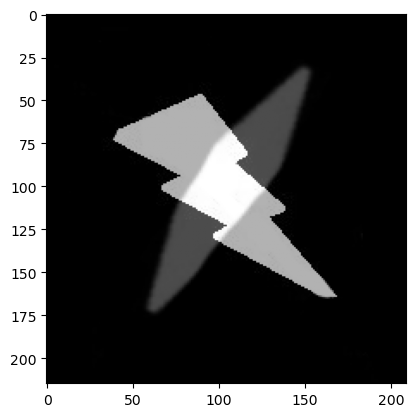

In [11]:
# 1. Blend
# TODO

lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
print(lightningbolt.shape)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
blob = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))

dst = cv2.addWeighted(lightningbolt,0.7,blob,0.3,0)

plt.imshow(dst, cmap="gray")
plt.show()
#cv2.imshow("dst", dst)


## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

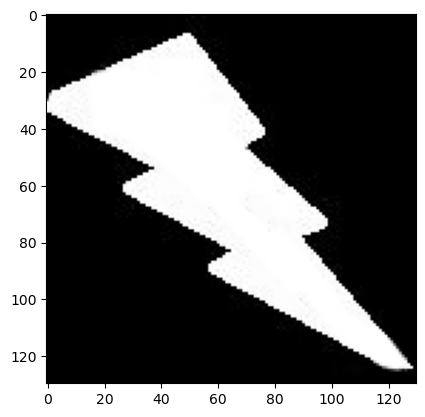

In [21]:
# 2. ROI
# TODO

bolt = lightningbolt[40:170, 40:170]
plt.imshow(bolt, cmap="gray")
plt.show()


## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

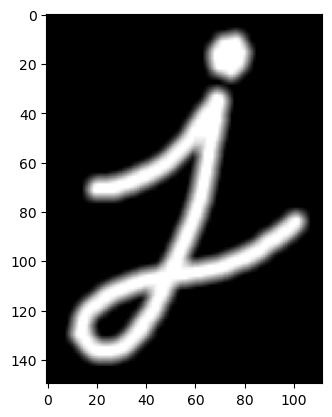

In [22]:
# 3. 
# TODO

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(letterj,-1,kernel)

plt.imshow(dst, cmap="gray")
plt.show()


# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

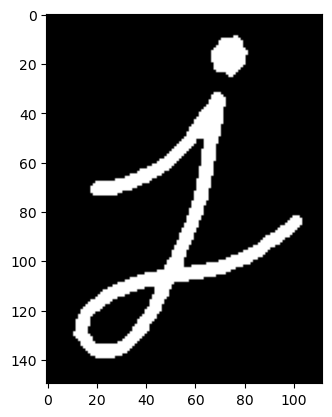

In [23]:
# 4
# TODO

kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(letterj,kernel,iterations = 1)


plt.imshow(erosion, cmap="gray")
plt.show()

## 5. Perform erosion on j with a 5x5 kernel

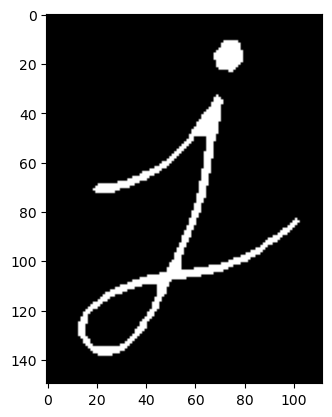

In [24]:
# 5
# TODO
kernel = np.ones((5,5),np.uint8)
dst = cv2.erode(letterj,kernel,iterations = 1)

plt.imshow(dst, cmap="gray")
plt.show()

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



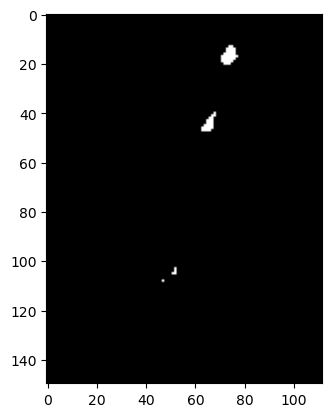

In [25]:
# 6
# TODO

kernel = np.ones((5,5),np.uint8)
dst = cv2.erode(letterj,kernel,iterations = 2)

plt.imshow(dst, cmap="gray")
plt.show()

## 7. Perform dilation on j with a 3x3 kernel

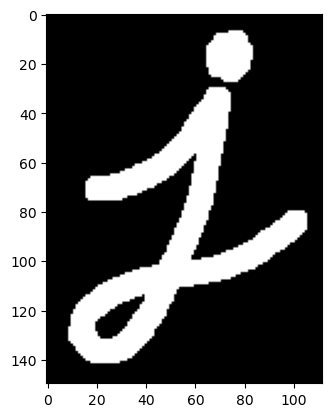

In [26]:
# 7
# TODO

kernel = np.ones((3,3),np.uint8)
dst = cv2.dilate(letterj,kernel,iterations = 1)

plt.imshow(dst, cmap="gray")
plt.show()

## 8. Perform dilation on j with a 5x5 kernel

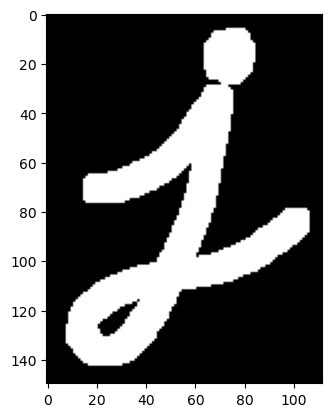

In [27]:
# 8
# TODO

# 7
# TODO

kernel = np.ones((5,5),np.uint8)
dst = cv2.dilate(letterj,kernel,iterations = 1)

plt.imshow(dst, cmap="gray")
plt.show()

## 9. What is the effect of kernel size on morphology operations?

In [ ]:
# 9
# TODO

Kernel size affects how many pixels are affected at a time, magnifying each operation.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [ ]:
# 10
# TODO

A lot of iterations will apply the same filter twice while a large kernel will apply a heavy filter once. The iterated one will appear more eroded

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

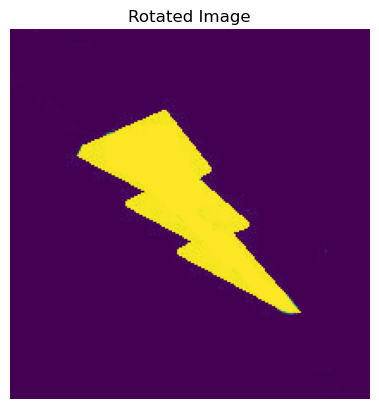

In [29]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 0, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 